In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import seaborn as sns
import warnings
from random import seed, randint,sample
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering,AffinityPropagation
from tqdm import tqdm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

city_data_scaled = pd.read_csv('../data/manipulated_data/city_data_scaled.csv')
tract_data_scaled = pd.read_csv('../data/manipulated_data/tract_data_scaled.csv')
city_data_manip = pd.read_csv('../data/manipulated_data/city_data_manip.csv')
tract_data_manip = pd.read_csv('../data/manipulated_data/tract_data_manip.csv')
city_data_scaled = city_data_scaled.set_index('stpl_fips')
tract_data_scaled = tract_data_scaled.set_index('stcotr_fips')
city_data_manip = city_data_manip.set_index('stpl_fips')
tract_data_manip = tract_data_manip.set_index('stcotr_fips')

## Clustering

### KMeans

100%|████████████████████████████████████████████| 9/9 [00:00<00:00,  8.31it/s]


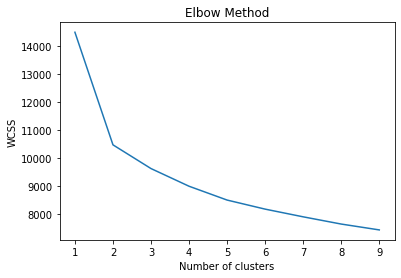

In [21]:
wcss = []
for i in tqdm(range(1, 10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(city_data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

5 clusters

In [22]:
kmeans2 = KMeans(n_clusters=5, init='k-means++')
kmeans2.fit(city_data_scaled)
pred = kmeans2.predict(city_data_scaled)
frame=city_data_scaled.copy()
frame['cluster'] = pred
frame['cluster'].value_counts()

2    114
4    102
1     90
3     77
0     58
Name: cluster, dtype: int64

In [23]:
frame_small = frame.loc[:, ['cluster','Absenteeism','Air pollution - particulate matter','Binge drinking',
                            'Breast cancer deaths']]
cancer = frame.loc[:, ['cluster','Breast cancer deaths','Cardiovascular disease deaths',
                       'Colorectal cancer deaths','Diabetes']]

C:\Users\Billy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Billy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


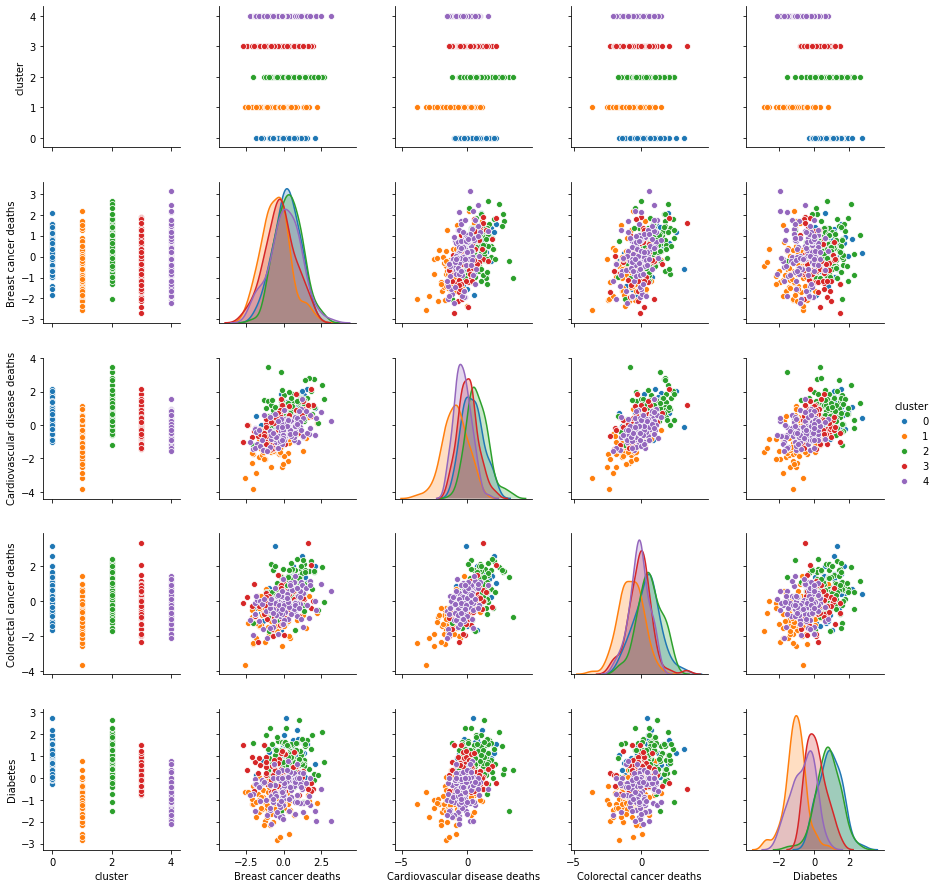

In [24]:
sns.pairplot(cancer, hue='cluster')

100%|████████████████████████████████████████████| 9/9 [00:25<00:00,  3.75s/it]


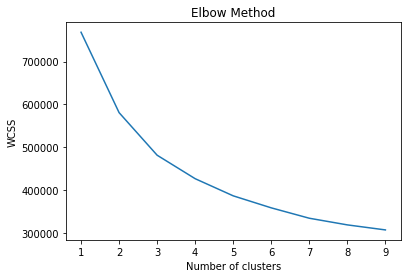

In [25]:
wcss2 = []
for i in tqdm(range(1, 10)):
    kmeans2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans2.fit(tract_data_scaled)
    wcss2.append(kmeans2.inertia_)
plt.plot(range(1,10), wcss2)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans3 = KMeans(n_clusters=5, init='k-means++')
kmeans3.fit(tract_data_scaled)
pred2 = kmeans3.predict(tract_data_scaled)
frame2=tract_data_scaled.copy()
frame2['cluster'] = pred2
frame2['cluster'].value_counts()

2    9285
1    5989
0    5104
4    3637
3    2833
Name: cluster, dtype: int64

### DBSCAN

In [27]:
city_arr = np.array(city_data_scaled)

In [28]:
dbsc = DBSCAN(eps=.5, min_samples=30)
labels = dbsc.fit_predict(city_arr)

### Hierarchical Clustering

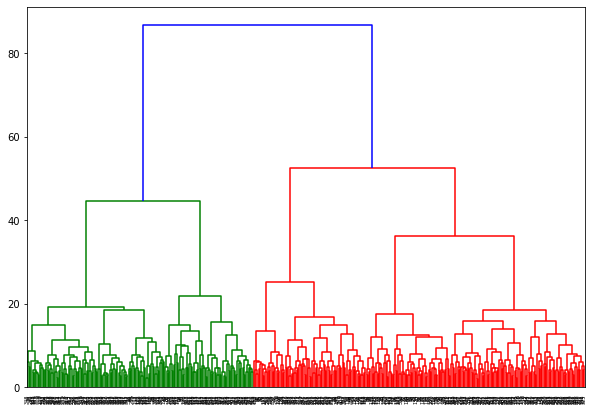

In [10]:
plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(city_data_scaled, method='ward'))

In [11]:
# plt.figure(figsize=(10,7))
# dend2 = shc.dendrogram(shc.linkage(tract_data_scaled, method='ward'))

In [29]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean',linkage='ward')
agg_pred = cluster.fit_predict(city_data_scaled)
cds_copy = city_data_scaled.copy()
cds_copy['agg_predicted'] = agg_pred

In [30]:
sequence = list(range(0,42))

In [31]:
rand_cols = sample(sequence, 4)
rand_cols.append(42)
rand_cols

[24, 30, 10, 4, 42]

C:\Users\Billy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Billy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


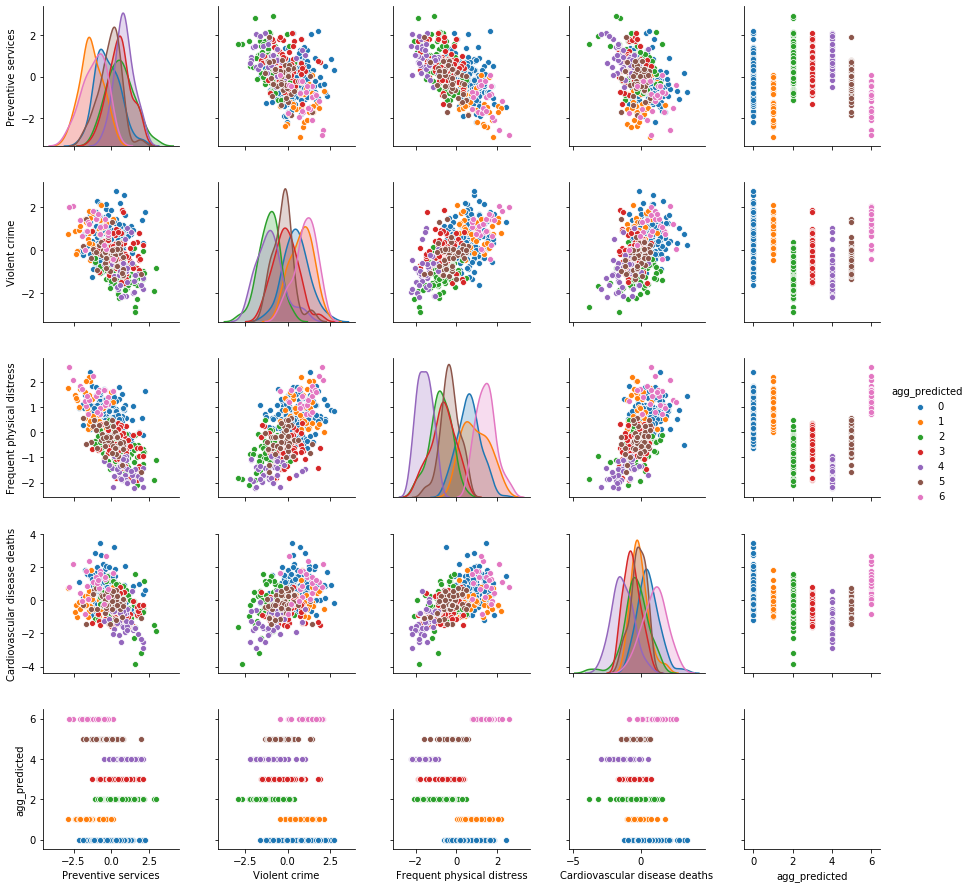

In [32]:
sns.pairplot(cds_copy.iloc[:, rand_cols], hue='agg_predicted')

### AffinityPropagation

In [33]:
affprop = AffinityPropagation()
affpred = affprop.fit_predict(city_data_scaled)
cds_aff = city_data_scaled.copy()
cds_aff['aff_pred']=affpred

In [34]:
zto3 = list(range(0,4))
fourto7 = list(range(4,8))
eightto11 = list(range(8,12))
twelveto15 = list(range(12,16))
sixteento19 = list(range(16,20))
twentyto23 = list(range(20,24))
zto3.append(42)

C:\Users\Billy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Billy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


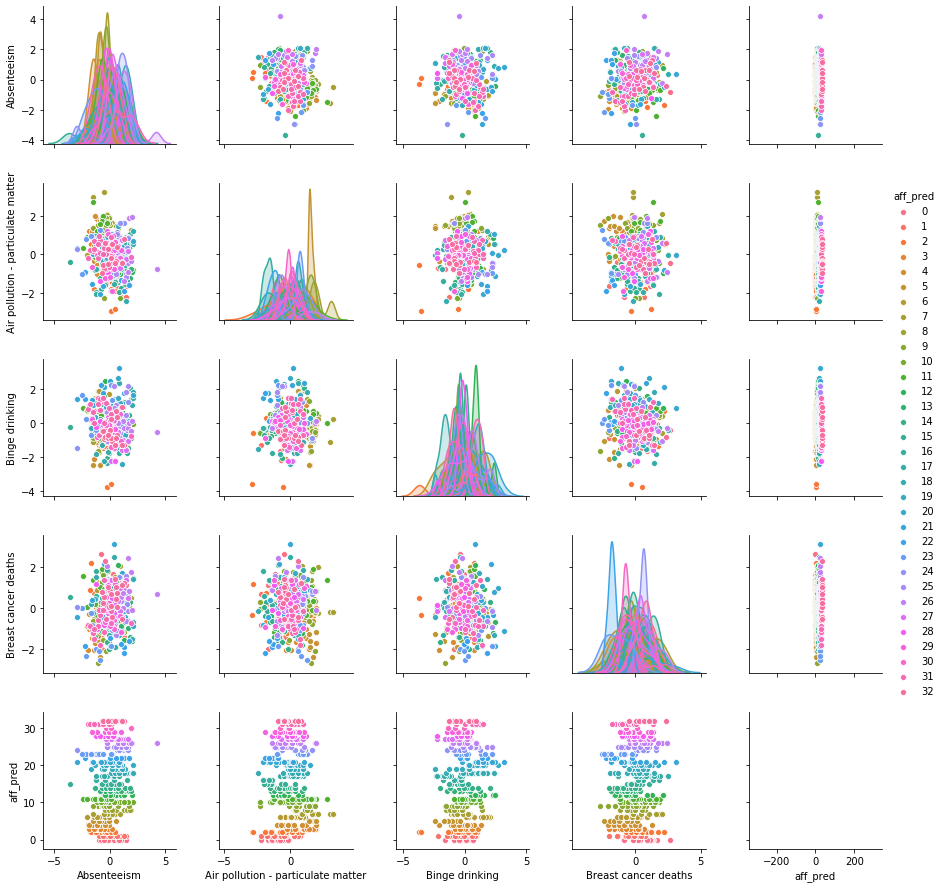

In [35]:
sns.pairplot(cds_aff.iloc[:, zto3],hue='aff_pred')

# Classification

#### Logistic Regression

In [36]:
# scoring classification models
def cv_score(clf, x, y, score_func=accuracy_score):
    result=0
    nfold=5
    for train, test in KFold(nfold).split(x):
        clf.fit(x[train],y[train])
        result += score_func(clf.predict(x[test]), y[test])
    return result/nfold #average

In [52]:
# using kmeans clustering
warnings.filterwarnings('ignore')
X_c_tr, X_c_test, y_c_tr,y_c_test = train_test_split(city_data_scaled.values, frame['cluster'].values,
                                                     random_state=5)
c_space = np.logspace(0.001, 0.1, 1, 10, 100)
logreg = LogisticRegression()
param_grid = {'C': c_space}
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_c_tr, y_c_tr)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
logreg_best = LogisticRegression(C=logreg_cv.best_params_['C'])
score = cv_score(logreg_best, X_c_tr, y_c_tr)
score

Tuned Logistic Regression Parameters: GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': array([1.00461579])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best score is 0.8242424242424242


0.8181818181818181

In [47]:
logreg_cv.best_params_

{'C': 1.0046157902783952}

#### Decision tree

In [74]:
def dt_fx(data, data_cluster):
    X_tr, X_test, y_tr,y_test = train_test_split(data.values, data_cluster.values,
                                                         random_state=5)
    dt = DecisionTreeClassifier()
    dt_base_fit = dt.fit(X_tr, y_tr)
    dt_base_pred = dt_base_fit.predict(X_test)
    dt_base_score = accuracy_score(y_test, dt_base_pred)
    print("Baseline Score: {}".format(dt_base_score))
    
    md = np.linspace(1,32,32,endpoint=True)
    min_samples = np.linspace(0.1,1,10,endpoint=True)
    mleaf = np.linspace(0.1,0.5,5,endpoint=True)
    maxfeat = list(range(1,X_tr.shape[1]))
    param_grid = {'max_depth': md, 'min_samples_split': min_samples, 'min_samples_leaf': mleaf, 
                  'max_features': maxfeat}
    dt_cv = GridSearchCV(dt,param_grid, cv=5, scoring='accuracy')
    dt_cv.fit(X_tr,y_tr)
    print("Tuned Parameters: {}".format(dt_cv.best_params_)) 
    print("Best score is {}".format(dt_cv.best_score_))
    dt_best = DecisionTreeClassifier(max_depth = dt_cv.best_params_['max_depth'],
                                    min_samples_split = dt_cv.best_params_['min_samples_split'],
                                    min_samples_leaf = dt_cv.best_params_['min_samples_leaf'],
                                    max_features = dt_cv.best_params_['max_features'])
    dt_best_fit = dt_best.fit(X_tr, y_tr)
    dt_best_pred = dt_best_fit.predict(X_test)
    dt_score = accuracy_score(y_test, dt_best_pred)
    return dt_score

In [75]:
city_score = dt_fx(city_data_scaled, frame['cluster'])
print(city_score)
dt_fx(tract_data_scaled, frame2['cluster'])

Baseline Score: 0.7027027027027027
Tuned Parameters: {'max_depth': 15.0, 'max_features': 24, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2}
Best score is 0.7272727272727273
0.6486486486486487
Baseline Score: 0.9255065554231228
Tuned Parameters: {'max_depth': 4.0, 'max_features': 27, 'min_samples_leaf': 0.1, 'min_samples_split': 0.30000000000000004}
Best score is 0.8397894318633293


0.8127234803337307

In [73]:
dt_fx(city_data_scaled, cds_copy['agg_predicted'])

Baseline Score: 0.7657657657657657
Tuned Parameters: {'max_depth': 12.0, 'max_features': 9, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2}
Best score is 0.6424242424242425


0.0990990990990991

In [71]:
dt_fx(city_data_scaled, cds_aff['aff_pred'])

Baseline Score: 0.2972972972972973
Tuned Parameters: {'max_depth': 15.0, 'max_features': 18, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
Best score is 0.24848484848484848


0.04504504504504504